In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import anderson, kstest, jarque_bera, norm, probplot, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/models_result.csv")


data['ws']=data['ws'].astype(str)
data['ov']=data['ov'].astype(str)

data

,ws,ov,pos,md,wf1
0,100,25,C,4,0.873110
1,100,50,C,4,0.886850
2,100,75,C,4,0.861089
3,150,25,C,4,0.907143
4,150,75,C,4,0.843920
...,...,...,...,...,...
8095,150,50,R,5,0.886588
8096,150,75,R,5,0.878223
8097,50,25,R,5,0.846991
8098,50,50,R,5,0.817565


## **ANOVA GENERAL**

In [3]:
model = ols('wf1 ~ C(ws) + C(ov) + C(ws):C(ov)', data=data).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(ws),2.0,2.769533,1.384767,943.805669,0.000000e+00
C(ov),2.0,0.323829,0.161914,110.354769,5.194716e-48
C(ws):C(ov),4.0,0.258077,0.064519,43.973994,1.425060e-36
Residual,8091.0,11.871243,0.001467,NaN,NaN


In [4]:
# TEST DE NORMALIDAD DE ANDERSON DARLING
print("TEST DE NORMALIDAD DE ANDERSON DARLING")
result = anderson(model.resid)
print(f'Estadístico de prueba: {result.statistic}')
print('Valor crítico para nivel de 5%:', result.critical_values[2])
if result.statistic > result.critical_values[2]:  # Si el estadístico es mayor que el valor crítico al 5%
    print("Rechazamos la hipótesis nula: los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos siguen una distribución normal.")

# TEST DE NORMALIDAD DE KOLMOGOROV-SMIRNOV
print("\nTEST DE NORMALIDAD DE KOLMOGOROV-SMIRNOV")
stat, p_value = kstest(model.resid, 'norm')
print(f'Estadístico: {stat}, p-valor: {p_value}')
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos siguen una distribución normal.")

# TEST DE Jarque-Bera
print("\nTEST DE JARQUE-BERA")
stat, p_value = jarque_bera(model.resid)
print(f'Estadístico: {stat}, p-valor: {p_value}')
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos siguen una distribución normal.")

TEST DE NORMALIDAD DE ANDERSON DARLING
Estadístico de prueba: 98.70816870641647
Valor crítico para nivel de 5%: 0.787
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.

TEST DE NORMALIDAD DE KOLMOGOROV-SMIRNOV
Estadístico: 0.46162435060692597, p-valor: 0.0
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.

TEST DE JARQUE-BERA
Estadístico: 57.72237861919584, p-valor: 2.922434200538066e-13
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


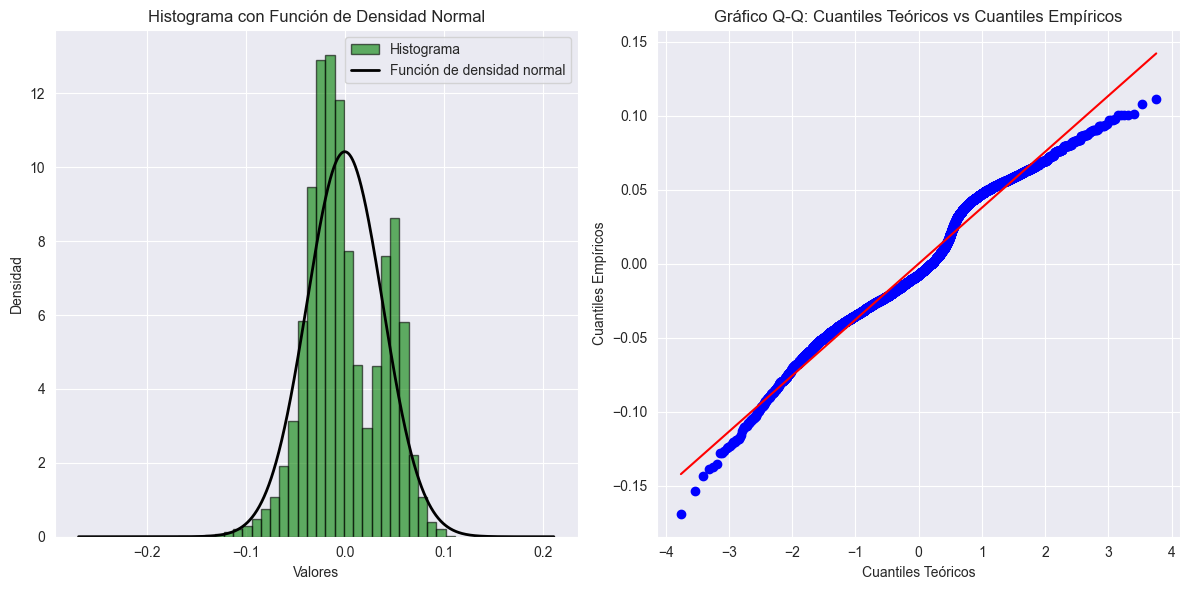

In [5]:
# Crear una figura con dos subgráficos (1x2)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas


#HISTOGRAMA
# Calcular el rango para la función de densidad
x = np.linspace(min(model.resid)-0.1, max(model.resid)+0.1, 1000)
pdf = norm.pdf(x, np.mean(model.resid), np.std(model.resid))
# Crear el histograma
axs[0].hist(model.resid, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histograma')
# Superponer la función de densidad normal
axs[0].plot(x, pdf, 'k', linewidth=2, label='Función de densidad normal')
# Añadir título y etiquetas
axs[0].set_title('Histograma con Función de Densidad Normal')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Densidad')
axs[0].legend()


# GRAFICO Q-Q
probplot(model.resid, dist="norm", plot=axs[1])
# Añadir título y etiquetas
axs[1].set_title('Gráfico Q-Q: Cuantiles Teóricos vs Cuantiles Empíricos')
axs[1].set_xlabel('Cuantiles Teóricos')
axs[1].set_ylabel('Cuantiles Empíricos')


# Ajustar el espaciado entre subgráficos
plt.tight_layout()
# Mostrar la figura
plt.show()


TEST DE TUKEY
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   100    150   0.0043 0.0002  0.0018  0.0068   True
   100     50  -0.0369    0.0 -0.0394 -0.0344   True
   150     50  -0.0412    0.0 -0.0437 -0.0387   True
----------------------------------------------------


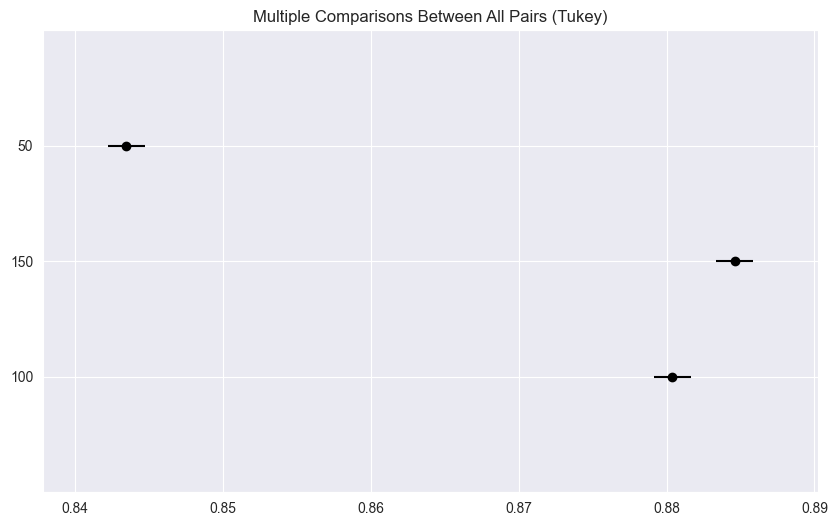

In [6]:
# Comparación de medias utilizando test de Tukey
print("\nTEST DE TUKEY")
tukey = pairwise_tukeyhsd(endog=data['wf1'], groups=data['ws'], alpha=0.05)
print(tukey)

tukey.plot_simultaneous()
plt.show()


TEST DE TUKEY
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    25     50   0.0088   0.0 0.0061 0.0116   True
    25     75   0.0154   0.0 0.0127 0.0182   True
    50     75   0.0066   0.0 0.0039 0.0093   True
-------------------------------------------------


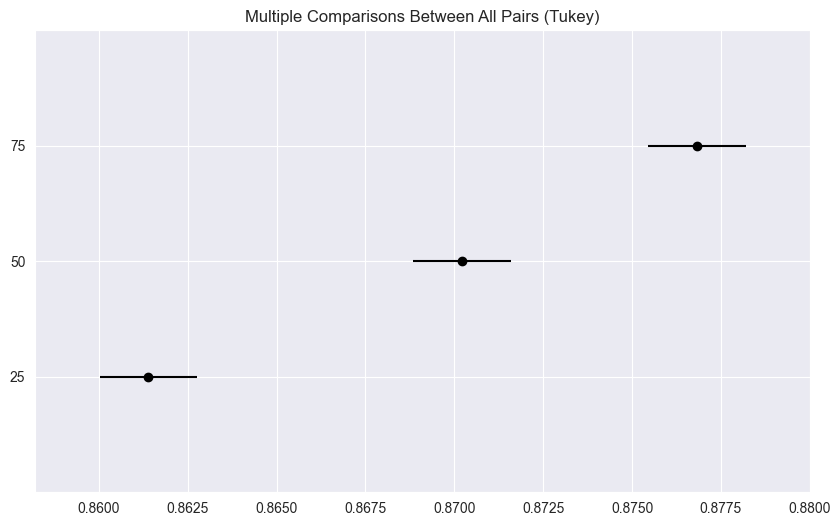

In [7]:
# Comparación de medias utilizando test de Tukey
print("\nTEST DE TUKEY")
tukey = pairwise_tukeyhsd(endog=data['wf1'], groups=data['ov'], alpha=0.05)
print(tukey)

tukey.plot_simultaneous()
plt.show()


TEST DE TUKEY


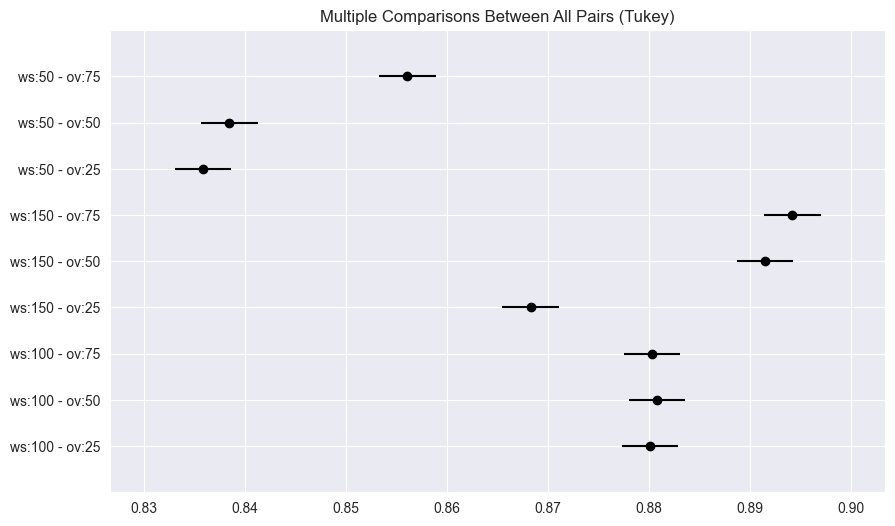

In [8]:
# Comparación de medias utilizando test de Tukey
print("\nTEST DE TUKEY")
tukey = pairwise_tukeyhsd(endog=data['wf1'], groups='ws:'+data['ws']+' - ov:'+data['ov'], alpha=0.05)

tukey.plot_simultaneous()
plt.show()

# en promedio cuando se usa WS=150 se obtienen los mejores wf1_score, y con ol=75 en promedio se obtienen los mejores valores
# esto da indicio que en la configuracion ws=150 y ol=75 se obtendrá los mejores valores de wf1_score

# al comparar todas las combinaciones encontramos que la configuracion ws=150,ol=75 es la mejor aunque no se logra diferenciar de ws:150,ol:75 y ws=100,ol=75

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

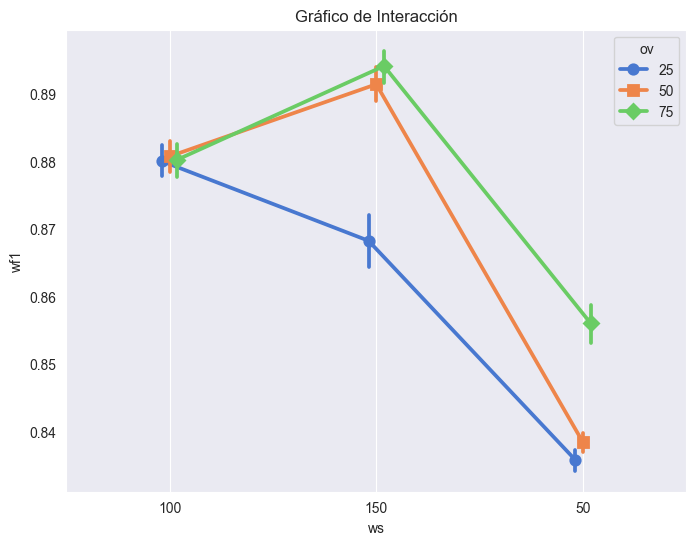

In [9]:
# Crear el gráfico de interacción
plt.figure(figsize=(8, 6))
sns.pointplot(data=data, x='ws', y='wf1', hue='ov',
               dodge=True, markers=['o', 's', 'D'],
               palette='muted', errorbar=('ci', 95))

# Añadir etiquetas y título
plt.title('Gráfico de Interacción')
plt.xlabel('ws')
plt.ylabel('wf1')
plt.legend(title='ov')
plt.grid()
plt.show()

In [10]:
# Agrupar por 'ov' y aplicar el test
grupos_ov = [grupo["wf1"].values for _, grupo in data.groupby("ov")]
H_ov, p_ov = kruskal(*grupos_ov)

print(f"Test Kruskal-Wallis para 'ov': H = {H_ov:.4f}, p-value = {p_ov:.4f}")
if p_ov < 0.05:
    print(f"Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos de 'ov' (H = {H_ov:.4f}, p-value = {p_ov:.4f}).")
else:
    print(f"No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar diferencias significativas entre los grupos de 'ov' (H = {H_ov:.4f}, p-value = {p_ov:.4f}).")


# Agrupar por 'ws' y aplicar el test
grupos_ws = [grupo["wf1"].values for _, grupo in data.groupby("ws")]
H_ws, p_ws = kruskal(*grupos_ws)

print(f"Test Kruskal-Wallis para 'ws': H = {H_ws:.4f}, p-value = {p_ws:.4f}")
# Para 'ws'
if p_ws < 0.05:
    print(f"Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos de 'ws' (H = {H_ws:.4f}, p-value = {p_ws:.4f}).")
else:
    print(f"No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar diferencias significativas entre los grupos de 'ws' (H = {H_ws:.4f}, p-value = {p_ws:.4f}).")

data["ws_ov"] = data["ws"].astype(str) + "_" + data["ov"].astype(str)

# Agrupar por la interacción de ws y ov
grupos_interaccion = [grupo["wf1"].values for _, grupo in data.groupby("ws_ov")]

# Aplicar el test de Kruskal-Wallis
H_interaccion, p_interaccion = kruskal(*grupos_interaccion)

print(f"Test Kruskal-Wallis para la interacción ws_ov: H = {H_interaccion:.4f}, p-value = {p_interaccion:.4f}")
# Para la interacción 'ws_ov'
if p_interaccion < 0.05:
    print(f"Rechazamos la hipótesis nula: La interacción entre 'ws' y 'ov' tiene un efecto significativo sobre 'wf1' (H = {H_interaccion:.4f}, p-value = {p_interaccion:.4f}).")
else:
    print(f"No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que la interacción entre 'ws' y 'ov' tenga un efecto significativo sobre 'wf1' (H = {H_interaccion:.4f}, p-value = {p_interaccion:.4f}).")

Test Kruskal-Wallis para 'ov': H = 162.8128, p-value = 0.0000
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos de 'ov' (H = 162.8128, p-value = 0.0000).
Test Kruskal-Wallis para 'ws': H = 1804.4835, p-value = 0.0000
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos de 'ws' (H = 1804.4835, p-value = 0.0000).
Test Kruskal-Wallis para la interacción ws_ov: H = 2102.4409, p-value = 0.0000
Rechazamos la hipótesis nula: La interacción entre 'ws' y 'ov' tiene un efecto significativo sobre 'wf1' (H = 2102.4409, p-value = 0.0000).


In [11]:
# Crear un DataFrame con nuevas combinaciones de factores para predecir
configuraciones = pd.DataFrame({
    'ws': ['50','100','150','50','100','150','50','100','150'],
    'ov': ['75','75','75','50','50','50','25','25','25']
})

# Predecir utilizando el modelo
configuraciones['wf1'] = model.predict(configuraciones)

configuraciones_ordenadas = configuraciones.sort_values(by='wf1', ascending=False)

print(configuraciones_ordenadas)

    ws  ov       wf1
2  150  75  0.894142
5  150  50  0.891445
4  100  50  0.880759
1  100  75  0.880283
7  100  25  0.880058
8  150  25  0.868270
0   50  75  0.856047
3   50  50  0.838436
6   50  25  0.835839


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


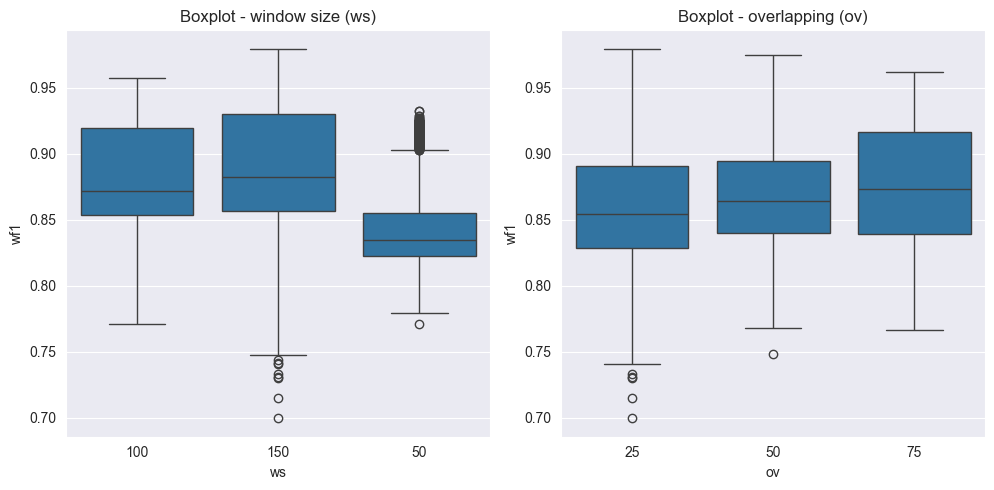

In [15]:
# Crear figuras
plt.figure(figsize=(15, 5))

# Boxplot para 'ws'
plt.subplot(1, 3, 1)
sns.boxplot(x="ws", y="wf1", data=data)
plt.title("Boxplot - window size (ws)")

# Boxplot para 'ov'
plt.subplot(1, 3, 2)
sns.boxplot(x="ov", y="wf1", data=data)
plt.title("Boxplot - overlapping (ov)")

# Mostrar las gráficas
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


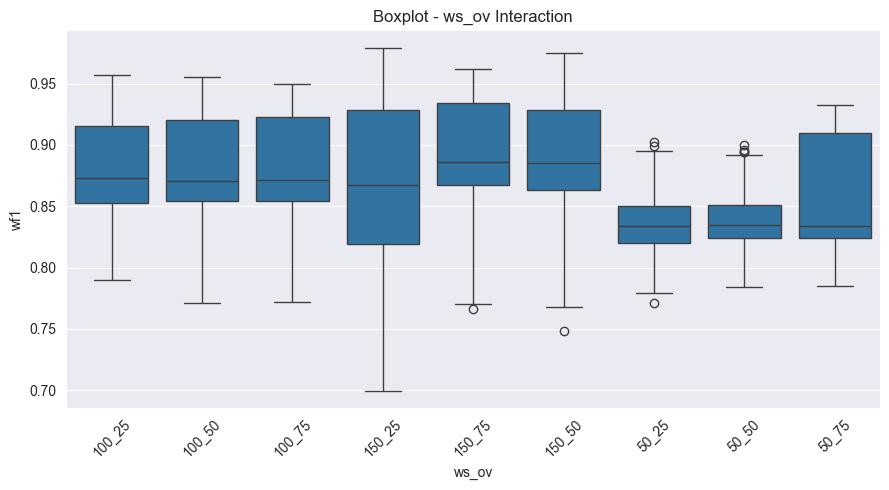

In [19]:
# Boxplot para la interacción 'ws_ov'
plt.figure(figsize=(9, 5))
sns.boxplot(x="ws_ov", y="wf1", data=data)
plt.xticks(rotation=45)
plt.title("Boxplot - ws_ov Interaction")

# Mostrar las gráficas
plt.tight_layout()
plt.show()